## MNIST

In [2]:
import tensorflow as tf
# from sklearn.model_selection import train_test_split

mnist = tf.keras.datasets.mnist

(tr_dt, tr_lb), (te_dt, te_lb) = mnist.load_data()

tr_dt, te_dt = tr_dt/255.0, te_dt/255.0

2023-10-31 15:26:53.101928: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 15:26:53.101965: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 15:26:53.102023: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 15:26:53.109472: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 15:26:54.409844: W tensorflow/compiler/

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

2023-10-31 15:26:56.366623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 15:26:56.450461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 15:26:56.450724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy' ,
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
import time

start_time = time.time()
hist = model.fit(tr_dt, tr_lb, validation_data=(te_dt, te_lb),
                 epochs=10, batch_size=100, verbose=1)

print('fit time : ', time.time()- start_time)

Epoch 1/10


2023-10-31 15:28:41.192079: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f921ca456b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 15:28:41.192130: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2023-10-31 15:28:41.197584: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-31 15:28:42.811041: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-10-31 15:28:42.925626: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 [==============================] - 6s 4ms/step - loss: 0.2240 - accuracy: 0.9355 - val_loss: 0.1030 - val_accuracy: 0.9692
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0865 - accuracy: 0.9742 - val_loss: 0.0783 - val_accuracy: 0.9757
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.0714 - val_accuracy: 0.9766
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0833 - val_accuracy: 0.9739
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.0772 - val_accuracy: 0.9769
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.0618 - val_accuracy: 0.9825
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0143 - accuracy: 0.9960 - val_loss: 0.0623 - val_accuracy: 0.9814
Epoch 8/10
600/60

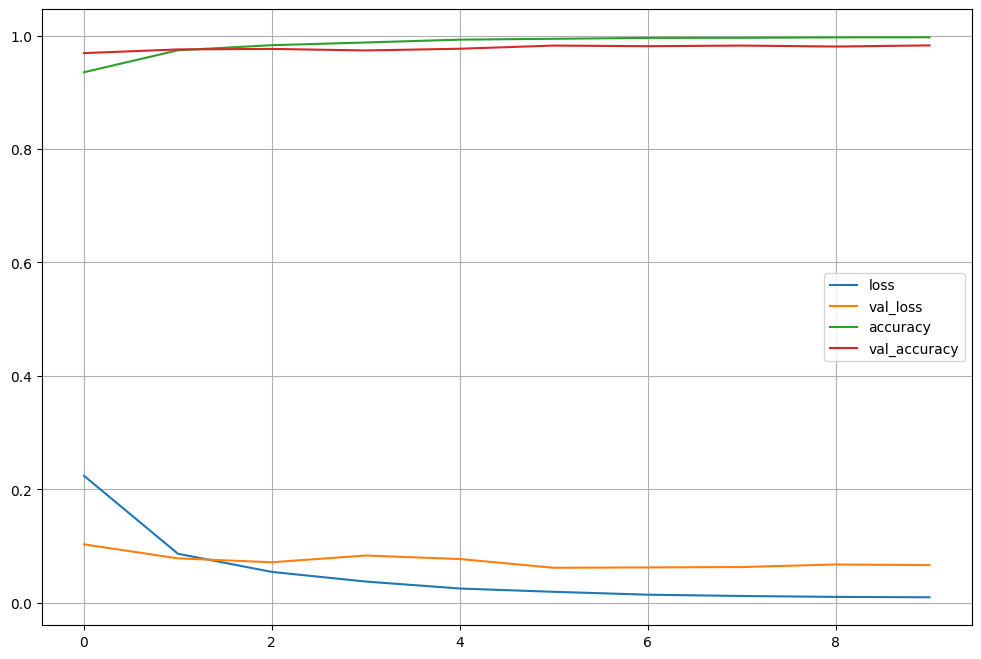

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [8]:
score = model.evaluate(te_dt, te_lb)

print('test loss : ', score[0])
print('test accu : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9828
test loss :  0.06642389297485352
test accu :  0.9828000068664551


### 뭐가 틀렸나 확인

In [9]:
import numpy as np

predict_result = model.predict(te_dt)
predict_label = np.argmax(predict_result, axis=1)
predict_label[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

앞 10개는 다 맞음

In [10]:
te_lb[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [11]:
wrong_result = []

for n in range(0, len(te_lb)):
    if predict_label[n]!= te_lb[n]:
        wrong_result.append(n)

len(wrong_result)

172

In [12]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[4761,
 9024,
 8522,
 3422,
 9749,
 2654,
 3062,
 2035,
 1678,
 1678,
 2118,
 9019,
 3550,
 149,
 947,
 5642]

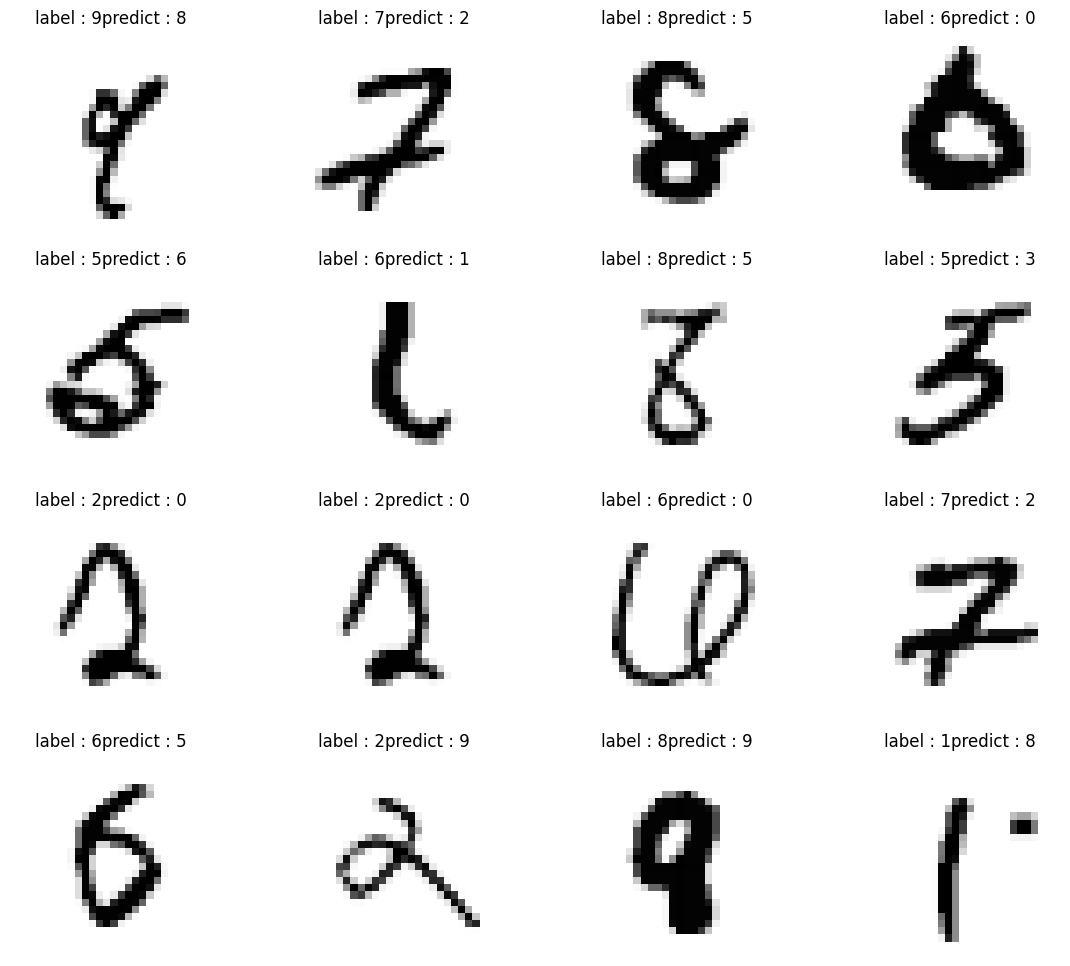

In [14]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(te_dt[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('label : '+ str(te_lb[n]) + 'predict : ' + str(predict_label[n]))
    plt.axis('off')

plt.show()